In [ ]:
import pickle
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

from src.preprocessing import preprocess_data
from src.utils.load_data import load_data
from src.utils.cumulative_probability import plot_cumulative_probability
from src.utils.plot_roc import plot_roc_curve

In [15]:
models = ["XGBoost", "LightGBM", "random_forest", "hist_gradient_boosting"]

XGBoost


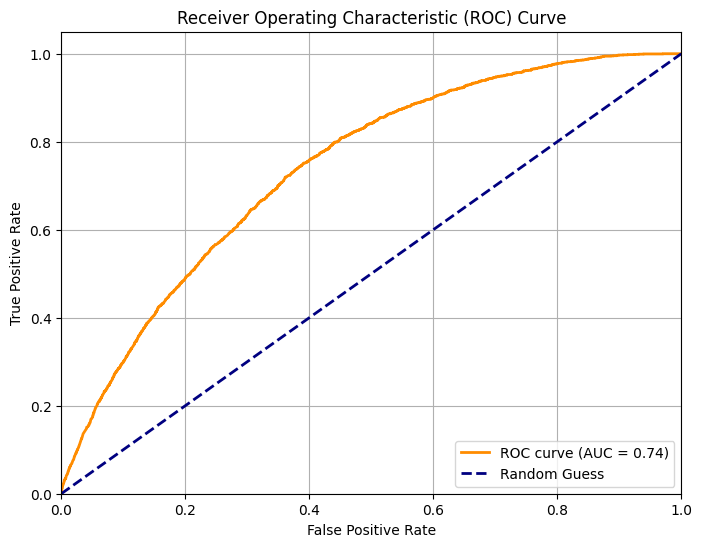

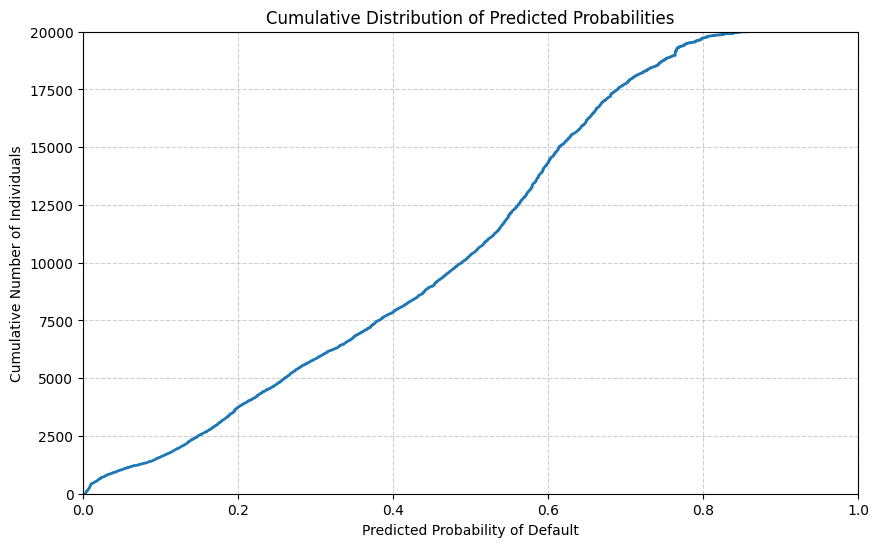

UnpicklingError: invalid load key, '\x02'.

In [16]:
for model in models:
    with open(f"models/{model}.pkl", "rb") as file:
        loaded_model = pickle.load(file)

    X, y = preprocess_data(load_data())
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    y_pred_proba = loaded_model.predict_proba(X_test)[:, 1]

    print(model)
    
    plot_roc_curve(y_test, y_pred_proba)

    plot_cumulative_probability(y_pred_proba)